<a href="https://colab.research.google.com/github/AhmetTalhaTURKMEN/BLM0463-Wine_Dataset-Decision_Tree_Based_Method-Project/blob/main/Wine_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BLM0463-Veri-Madenciliğine-Giriş-Wine-Dataset

Bu projede "Wine" veri seti "Decision Tree based Methods" sınıflandırma yöntemi kullanılacaktır.

Wine Dataset: https://archive.ics.uci.edu/ml/datasets/Wine

## Wine Veri seti 

UCI Machine Learning Repository'deki Wine dataseti, üç farklı kaynaktan gelen İtalyan üzümlerinin kimyasal analizlerine dayanan bir sınıflandırma problemini çözmek için tasarlanmıştır. Amacı, farklı kimyasal bileşiklerin ve üzümlerin fiziksel özelliklerinin analizi yoluyla farklı kaynaklardan gelen şarapları doğru bir şekilde sınıflandırmaktır. <br><br>

|  Özellikler |  Değerleri |
| --- | --- |
| Veri Seti Türü | Multivariate |
| Örnek Sayısı | 178 |
| Alan | Physical |
| Özellik Özellikleri | Integer, Real |
| Özellik Sayısı | 13 |
| Veri Seti Bağış Tarihi | 01-07-1991 |
| İlişkili Görevler | Classification |

<br>

## Veri Seti Öznitelikleri
<br>

| Öznitelik Sayısı | Öznitelik | Açıklama |
| --- | --- | --- |
| 1 | Alcohol | Şarapların alkol miktarı |
| 2 | Malic acid | Şarapta bulunan elma asidi miktarı |
| 3 | Ash | Şarapta yanmış kalıntıların miktarı |
| 4 | Alcalinity of ash | Şarapta yanmış kalıntıların alkalinite seviyesi |
| 5 | Magnesium | Şarapta bulunan magnezyum miktarı |
| 6 | Total phenols | Şarapta bulunan toplam fenolik bileşenlerin miktarı |
| 7 | Flavanoids | Şarapta bulunan flavonoid bileşenlerin miktarı |
| 8 | Nonflavanoid phenols | Şarapta bulunan flavonoid olmayan fenolik bileşenlerin miktarı |
| 9 | Proanthocyanins | Şarapta bulunan proantosiyanidin bileşenlerin miktarı |
| 10 | Color intensity | Şarapların renk yoğunluğu |
| 11 | Hue | Şarapların rengi |
| 12 | OD280/OD315 of diluted wines | Sulandırılmış şarapların optik yoğunluğu |
| 13 | Proline | Şarapların prolin miktarı |
<br>

## Kullanılacak Teknolojiler

- Python Version 3.10.6
- Python pandas Kütüphanesi Version 2.0.1
- Python sklearn Kütüphanesi Version 1.2.2
- Python matplotlib Kütüphanesi Version 3.7.1
- Python seaborn Kütüphanesi Version 0.12.2
- Python ploty Kütüphanesi Version 5.14.1
- Python Ipython Kütüphanesi Version 8.12.0
- Python numpy Kütüphanesi Version 1.24.3
- graphviz Version 8.0.3







In [11]:
# Tüm importlar
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image
from sklearn.model_selection import train_test_split
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import graphviz
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Metrik importları
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [4]:
# Wine veri setini yükle
wine = load_wine()

# Veri Seti Hakkında Tanım

In [5]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

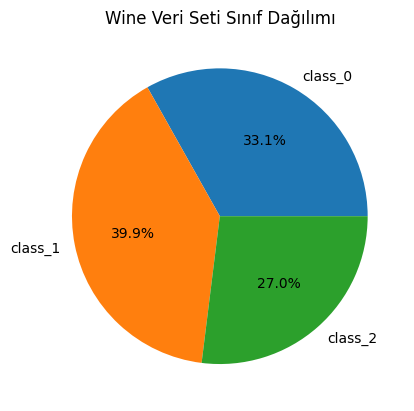

In [6]:
# Sınıf etiketlerini ve sınıf isimlerini al
labels = wine.target_names
class_counts = wine.target

# Sınıf sayılarını hesapla
class_count_dict = {}
for count in class_counts:
    if count in class_count_dict:
        class_count_dict[count] += 1
    else:
        class_count_dict[count] = 1

# Pasta dilimi grafik oluştur
fig, ax = plt.subplots()
ax.pie(class_count_dict.values(), labels=labels, autopct='%1.1f%%')
ax.set_title('Wine Veri Seti Sınıf Dağılımı')

plt.show()

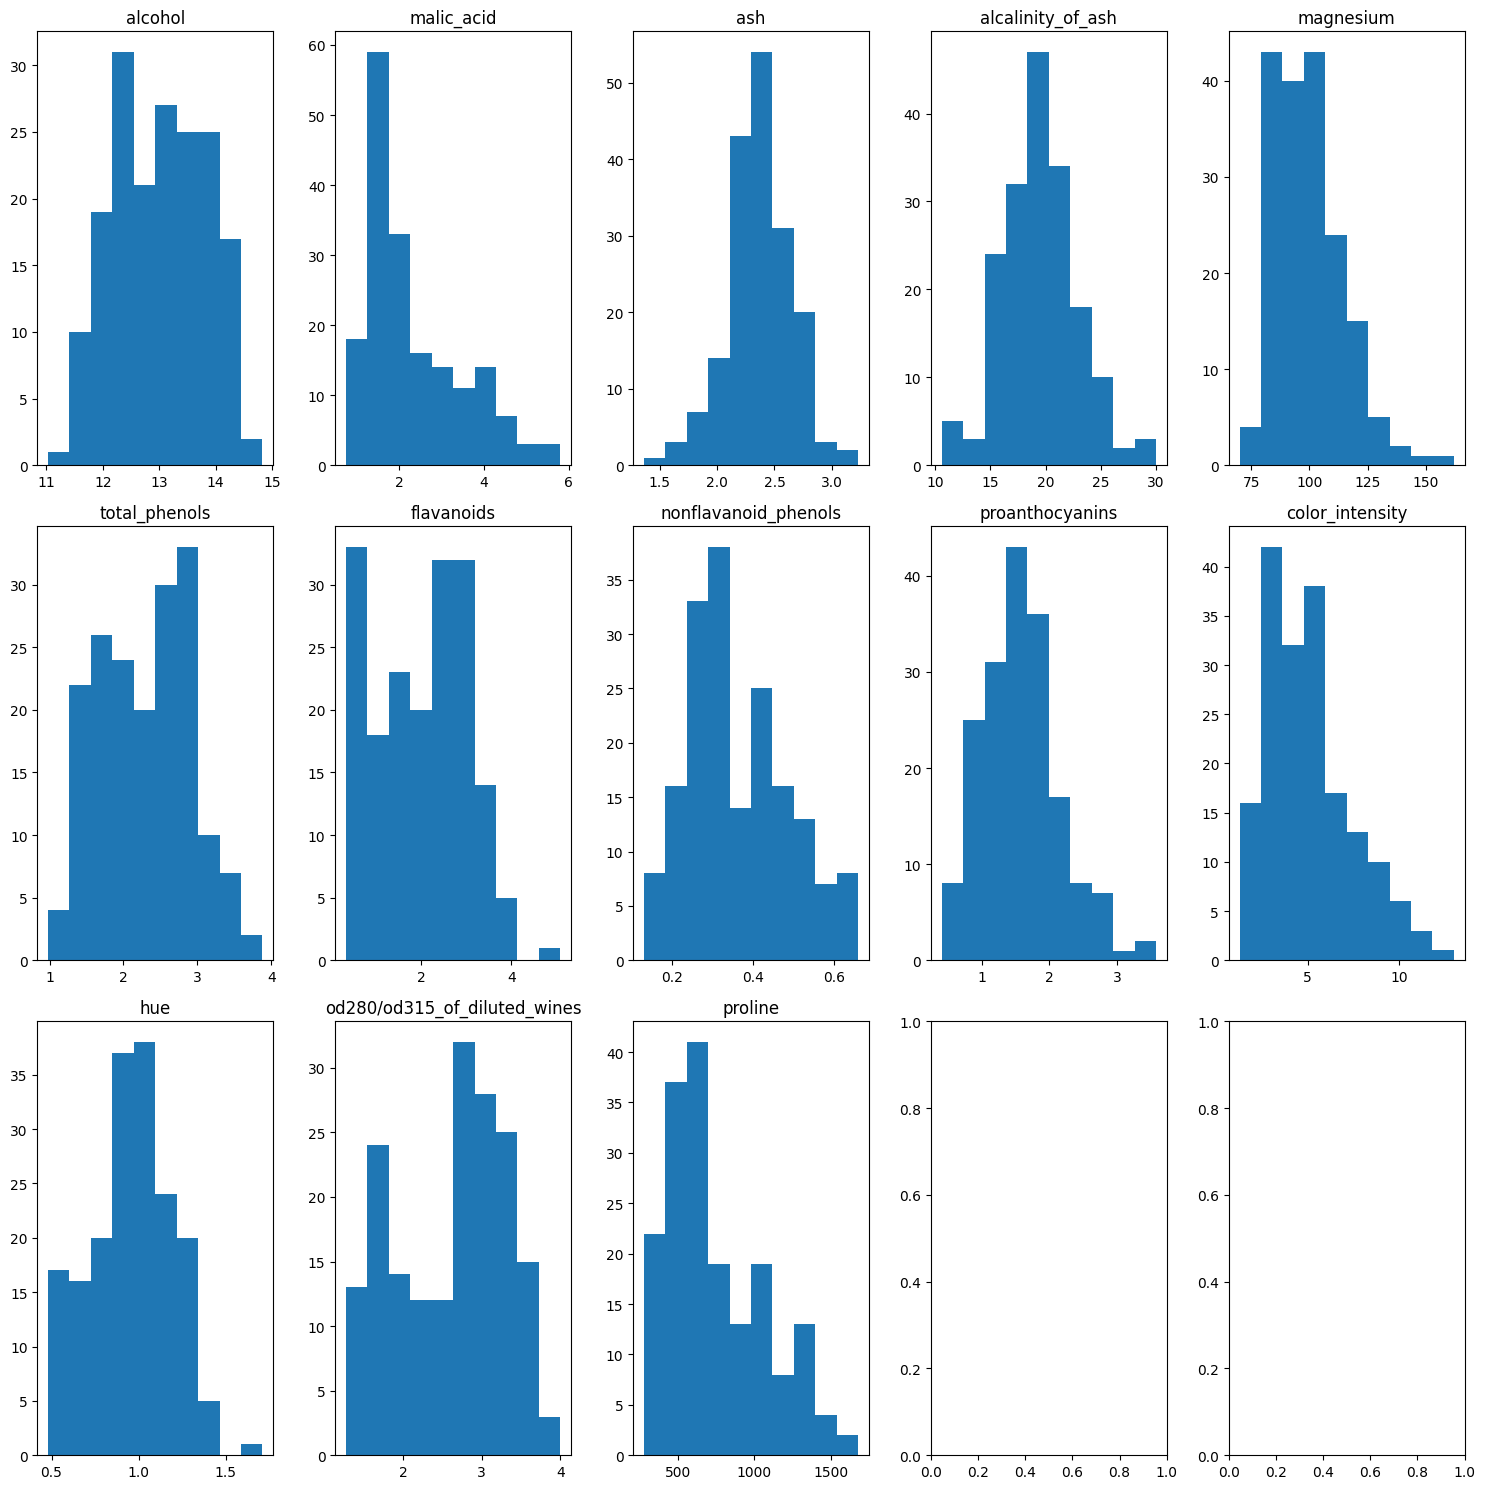

In [13]:
features = wine["feature_names"]
data = wine["data"].T

# 3x5 ızgara oluştur
rows = 3
cols = 5

fig, axes = plt.subplots(rows, cols, figsize=(15, 15))

# Özellikleri döngüyle gezip her bir subplot için görselleştirme yap
for i, ax in enumerate(axes.flatten()):
    if i < len(features):
        ax.hist(data[i], bins=10)
        ax.set_title(features[i]) 

# İzgarayı sığdır
plt.tight_layout()
plt.show()



In [18]:
feature_names = wine.feature_names

# Veriyi DataFrame'e dönüştür
df = pd.DataFrame(data, columns=feature_names)

# Sütunlar için ızgara için satır ve sütun sayısını belirle
rows = 5
cols = 5

# Subplot için özellikleri belirle
specs = [[{'type': 'box'}] * cols] * rows

# Subplot'ları oluştur
fig = make_subplots(rows=rows, cols=cols, start_cell="bottom-left", specs=specs)

for i, name in enumerate(feature_names):
    # Satır ve sütun indeksini al
    row = (i // cols) + 1
    col = (i % cols) + 1

    # Sütun için bir kutu grafiği ekle
    fig.add_trace(
        go.Box(y=df[name], name=name, width=500),
        row=row,
        col=col
    )

# Düzeni güncelle
fig.update_layout(title="Şarap Veri Seti İçin Kutu Grafikleri", title_x=0.5)

# Figürü göster
fig.show()

# YUKARIDAKI KODUN CALISMASI ICIN COLAB 'IN SITESINDEN GIRMEK GEREKIYOR.

Aşağıdaki kodda, veri setinden bir veri çerçevesi oluşturulur ve ardından bu veri çerçevesi üzerinde bir korelasyon matrisi hesaplanır. Daha sonra seaborn kütüphanesi kullanılarak bir ısı haritası (heatmap) oluşturulur ve matplotlib.pyplot kütüphanesi ile görselleştirme yapılır.

Bu kodda kullandığım kütüphaneler ve amaçları:

- pandas (pd): Veri analizi için kullanılan bir Python kütüphanesidir. Dataframe oluşturma ve manipülasyon gibi işlemleri kolaylaştırır.
- numpy (np): Bilimsel hesaplama için kullanılan bir Python kütüphanesidir. Burada, np.c_ işlevi ile veriler birleştirilmektedir.
- seaborn (sns): Veri görselleştirmesi için kullanılan bir Python kütüphanesidir. Heatmap oluşturma ve görselleştirme işlemleri için kullanılır.
- matplotlib.pyplot (plt): Veri görselleştirmesi için kullanılan bir Python kütüphanesidir. Grafiğin boyutunu belirlemek ve başlık eklemek gibi işlemleri gerçekleştirir.

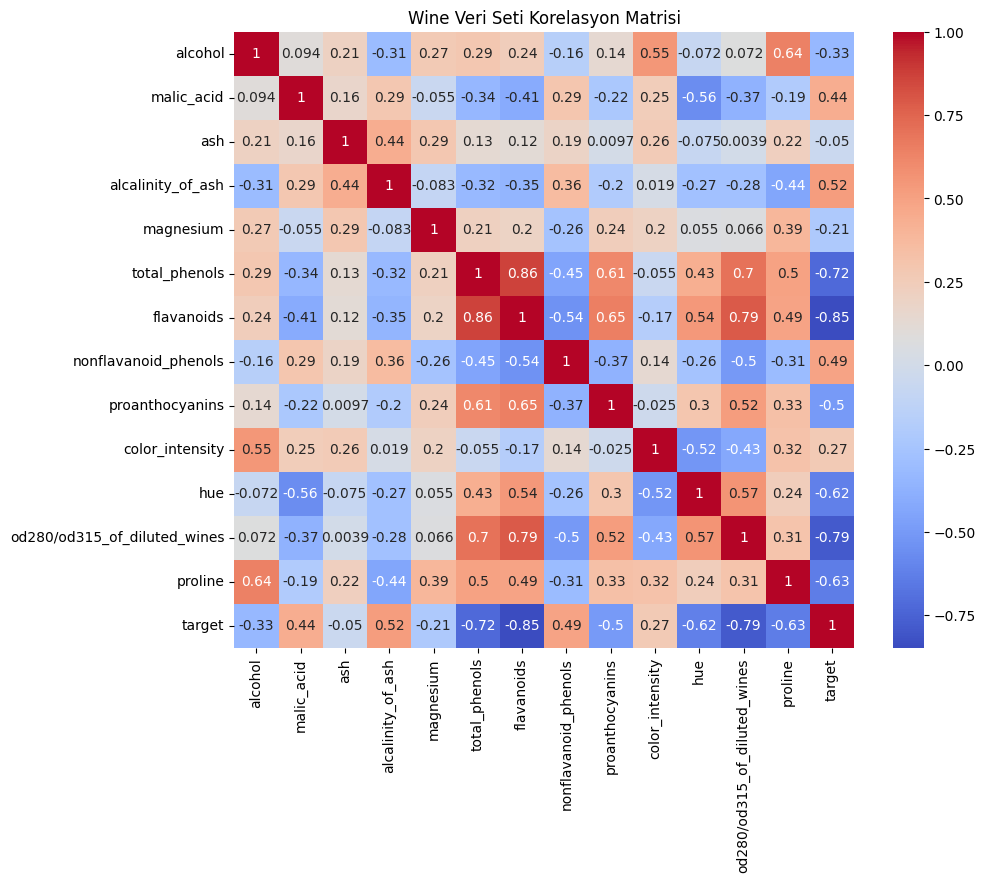

In [15]:
data = pd.DataFrame(data=np.c_[wine['data'], wine['target']], columns=wine['feature_names'] + ['target'])

# Korelasyon matrisini hesapla
correlation_matrix = data.corr()

# Korelasyon matrisini görselleştir
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Wine Veri Seti Korelasyon Matrisi')
plt.show()

Aşağıdaki kod, karar ağacı (decision tree) modelini eğitir ve ardından bu modelin görselleştirmesini oluşturur.

Bu kodda kullandığım kütüphaneler ve amaçları:
- sklearn.tree.DecisionTreeClassifier: Scikit-learn kütüphanesinin bir parçası olan DecisionTreeClassifier, karar ağacı tabanlı bir sınıflandırma modelidir. Veri kümesini kullanarak bir karar ağacı eğitmek için kullanılır.

- sklearn.tree.export_graphviz: Karar ağacını görselleştirmek için kullanılan bir fonksiyondur. Eğitilen karar ağacını alır ve onu Graphviz biçimine dönüştürerek görselleştirilebilir bir formatta temsil eder.

- graphviz.Source: Graphviz tarafından sağlanan bir Python arayüzüdür. export_graphviz tarafından üretilen Graphviz biçimindeki temsili alır ve bunu doğrudan görüntüleyebilir veya dosyaya kaydedebilirsiniz.

- graph.render: Oluşturulan karar ağacını belirli bir dosya adı ve biçimiyle kaydetmek için kullanılır. Bu örnekte format='png' ile bir PNG görüntü dosyası olarak kaydedilir.

- graph.view: Oluşturulan karar ağacını varsayılan görüntüleyici ile görüntülemek için kullanılır.

- Image: IPython.display modülünün bir parçası olan Image, Jupyter ortamlarında görüntüleri görüntülemek için kullanılır.

WINE DECISION TREE


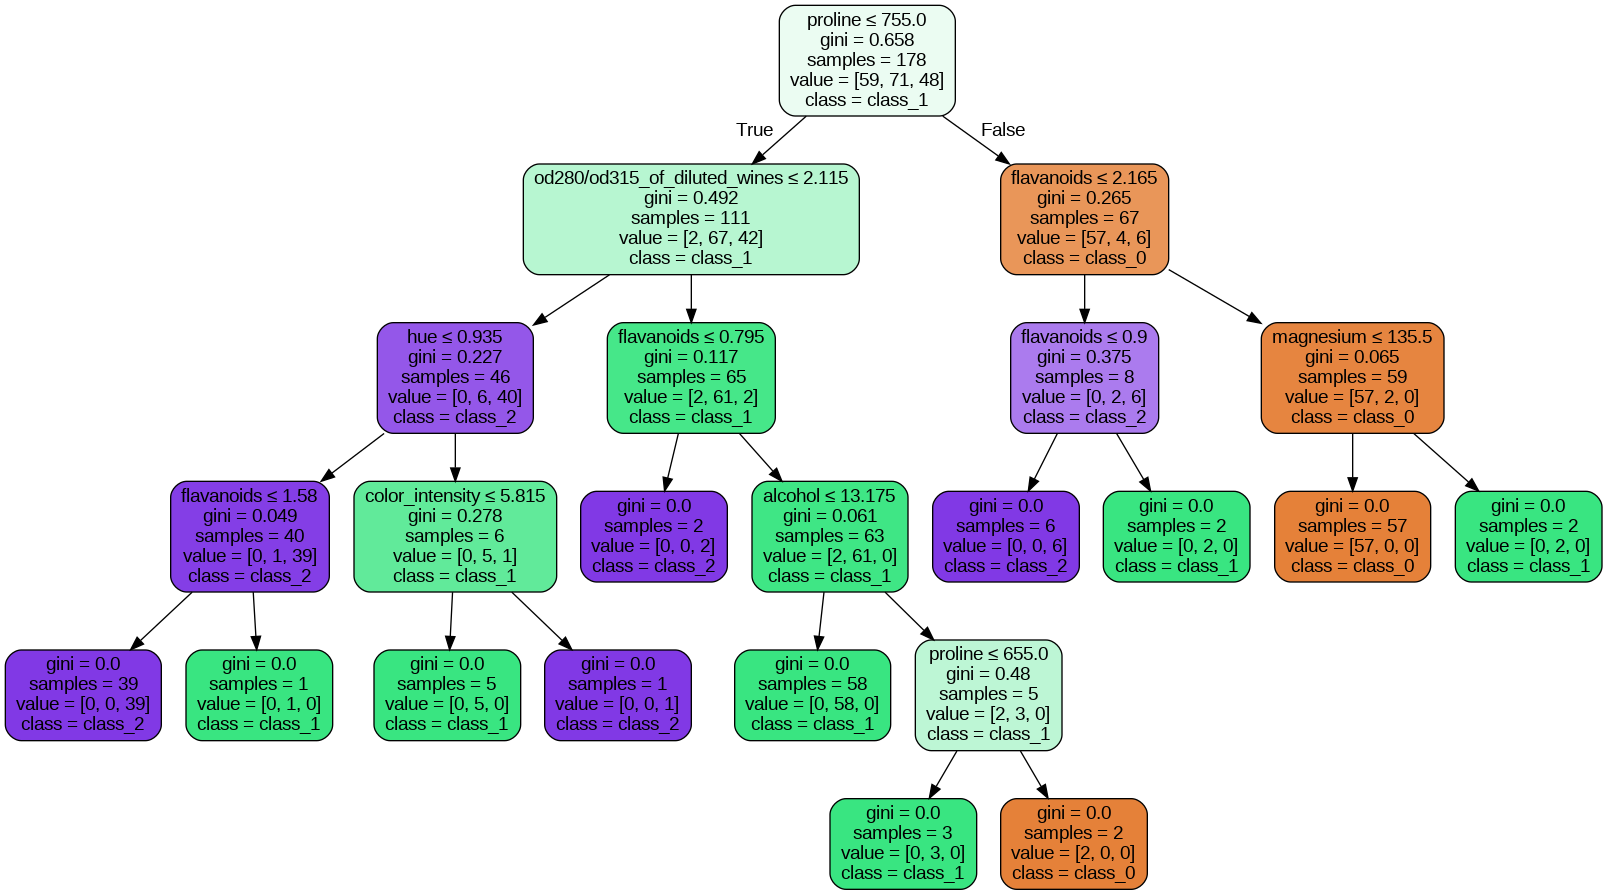

In [16]:
# Karar ağacı modelini eğit
dtc = DecisionTreeClassifier()
dtc.fit(wine.data, wine.target)
 
# Karar ağacını görselleştir
dot_data = export_graphviz(dtc, out_file=None, feature_names=wine.feature_names, class_names=wine.target_names, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("wine_decision_tree", format='png')
# graph.render("wine_decision_tree") #pdf oluşturur
graph.view()
print("WINE DECISION TREE")
Image(filename='wine_decision_tree.png')


Aşağıdaki kod veri setinin performansını değerlendiriyor. 

Accuracy: Modelin doğruluk seviyesini yazdırır.

Confusion Matrix: Karışıklık matrisidir. Sınıflandırma modelinin performansını değerlendirmek için kullanılan bir metriktir.

Precision (Hassasiyet): Bir sınıflandırma modelinin pozitif olarak tahmin ettiği örneklerin gerçekten pozitif olan örnekler arasındaki oranıdır. Hassasiyet, yanlış pozitiflerin az olması gereken durumlarda önemlidir.

Recall (Duyarlılık): Gerçek pozitiflerin tespit edilme oranıdır. Duyarlılık, yanlış negatiflerin az olması gereken durumlarda önemlidir.

F1-score: Hassasiyet ve duyarlılığın harmonik ortalamasıdır. Sınıflandırma modelinin hem hassasiyeti hem de duyarlılığı dikkate almasını sağlar. F1 skoru, hassasiyet ve duyarlılık arasında denge sağlamak için kullanılır.

Support (Destek): Her bir sınıf için gerçek etiketlerin sayısıdır. Bu, sınıfın veri setinde ne kadar sık olduğunu gösterir.

Accuracy: 0.9444444444444444
Confusion Matrix:
[[13  1  0]
 [ 0 14  0]
 [ 0  1  7]]
Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      0.93      0.96        14
     class_1       0.88      1.00      0.93        14
     class_2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



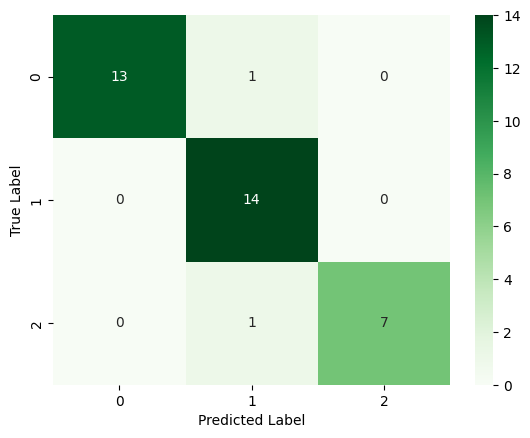

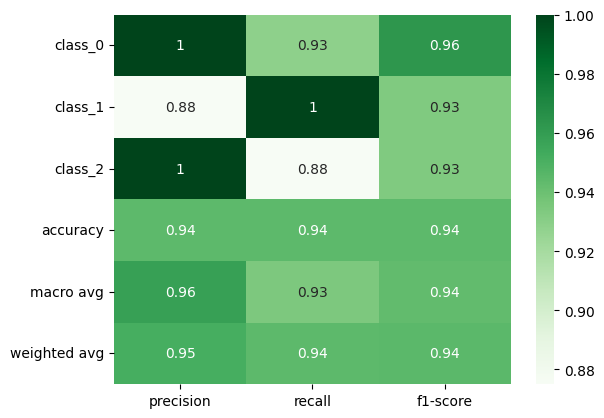

In [17]:
# Veri setini train ve test olarak ayır
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=42)

dtc.fit(X_train, y_train)

# Test veri setini kullanarak modelin performansını ölç
y_pred = dtc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=wine.target_names)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(report)

# Karışıklık matrisini görselleştir
sns.heatmap(cm, annot=True, cmap="Greens", fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
print("")

# Sınıflandırma raporunu görselleştir
report_df = pd.DataFrame.from_dict(classification_report(y_test, y_pred, target_names=wine.target_names, output_dict=True))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap="Greens")
plt.show()
